In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from preprocessor import Preprocessor


df = pd.read_parquet('../../cache/TSGCableProbes_processed_from_db.parquet')

In [22]:
df = df.drop(index=[388,380,376,374,373,372,378])

In [23]:
df.to_parquet('../../cache/TSGCableProbes_values_from_db.parquet') #TSGCableProbes heißt das es von der API kommt

In [8]:
unique_cable = df['ID'].unique()

just ran step start_pipeline shape=(391, 52) took 0:00:00s
just ran step drop_columns shape=(391, 8) took 0:00:00.001027s
just ran step get_value_from_class shape=(391, 36) took 0:00:00.142427s
just ran step drop_columns shape=(391, 26) took 0:00:00.001000s
just ran step extract_from_regex shape=(391, 30) took 0:00:00.005528s
                              ID          BENENNUNG  \
0    OR:wt.part.WTPart:182756070  Temperaturfuehler   
1    OR:wt.part.WTPart:182942514  Temperaturfuehler   
2    OR:wt.part.WTPart:183066077  Temperaturfuehler   
3    OR:wt.part.WTPart:183086980  Temperaturfuehler   
4    OR:wt.part.WTPart:183247819  Temperaturfuehler   
..                           ...                ...   
386  OR:wt.part.WTPart:136758058  Temperaturfuehler   
387  OR:wt.part.WTPart:152982951   Luftkanalfuehler   
388  OR:wt.part.WTPart:156530564  Temperaturfuehler   
389  OR:wt.part.WTPart:170948290  Temperaturfuehler   
390   OR:wt.part.WTPart:75375023  Temperaturfuehler   

           

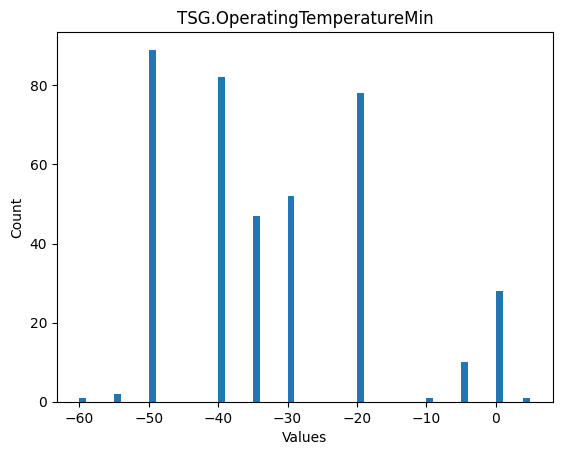

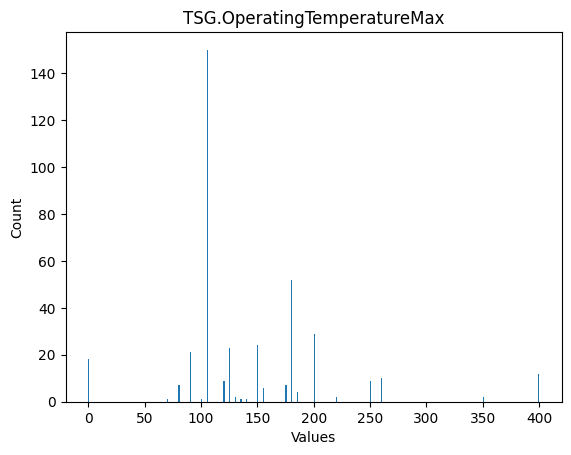

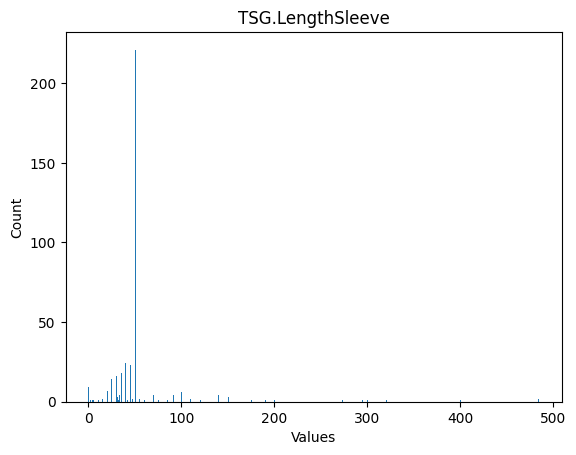

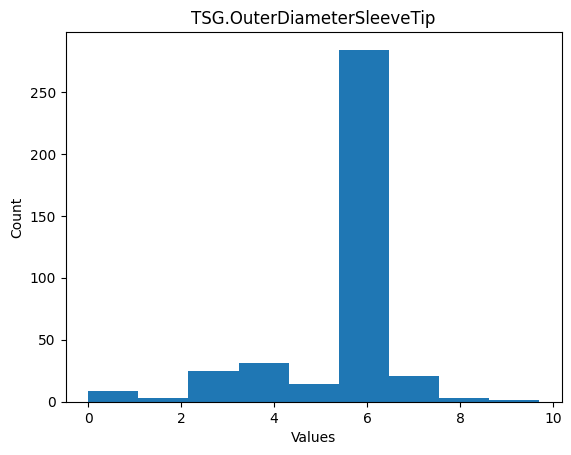

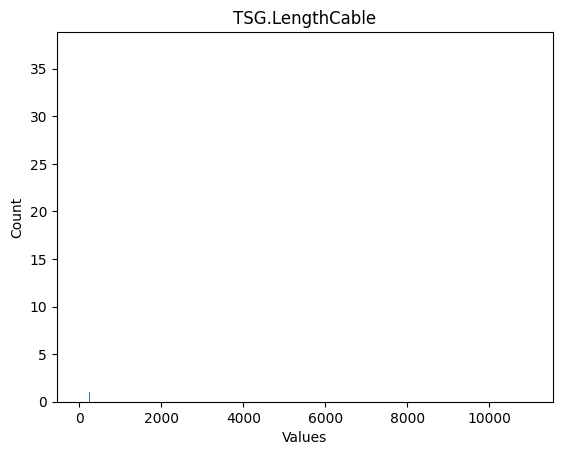

In [9]:
processor = Preprocessor("../../cache")
probes = processor.process("TSGCableProbes")
columns_core = ["TSG.OperatingTemperatureMin", "TSG.OperatingTemperatureMax", "TSG.WithCable","TSG.LengthSleeve","TSG.OuterDiameterSleeveTip",
                    "TSG.SensorType","TSG.LengthCable","TSG.ConnectorType"]

columns_numeric = ["TSG.OperatingTemperatureMin", "TSG.OperatingTemperatureMax", "TSG.LengthSleeve","TSG.OuterDiameterSleeveTip","TSG.LengthCable"]

for column in columns_numeric:
    fig = plt.figure()
    ax = fig.add_subplot()
    
    if column in columns_numeric:
        probes[column] = pd.to_numeric(probes[column])
    df_column = probes[column]
    ax.hist(df_column, bins=(int(df_column.max())-int(df_column.min())))
    ax.set_title(column)
    ax.set_xlabel("Values")
    ax.set_ylabel("Count")

Text(0, 0.5, 'Count')

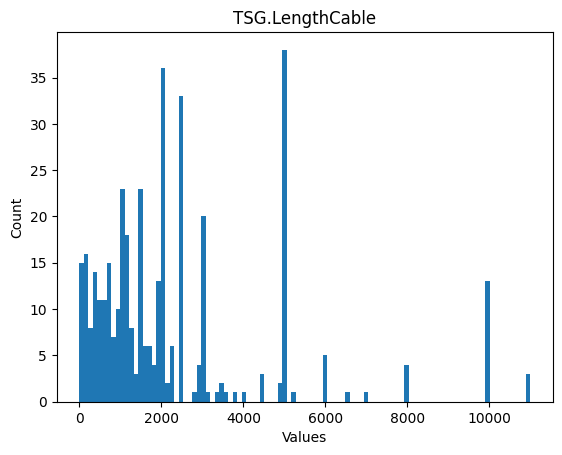

In [10]:
fig = plt.figure()
ax = fig.add_subplot()
column = "TSG.LengthCable"
probes[column] = pd.to_numeric(probes[column])
df_column = probes[column]
ax.hist(df_column, bins=100)
ax.set_title(column)
ax.set_xlabel("Values")
ax.set_ylabel("Count")

In [3]:
import matplotlib.pyplot as plt
from preprocessor import Preprocessor
processor = Preprocessor("../../cache")
probes = processor.process("TSGCableProbes")

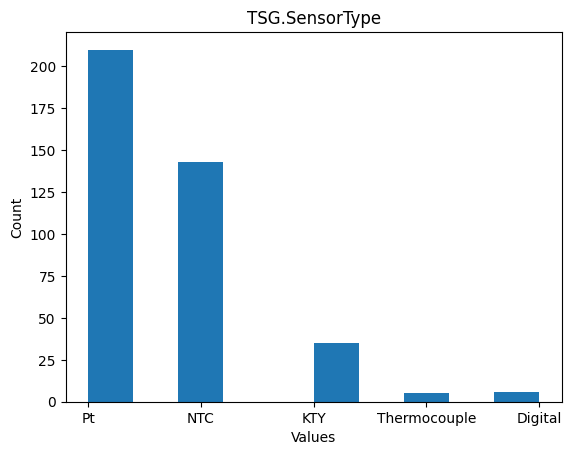

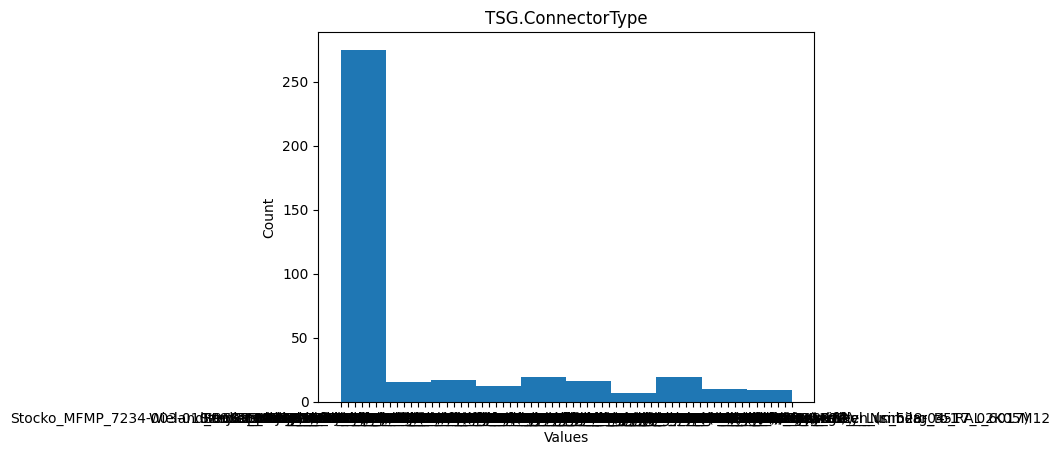

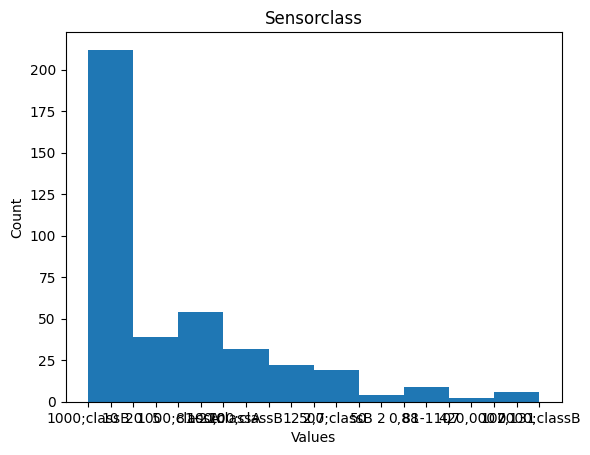

In [4]:
columns_core = ["TSG.OperatingTemperatureMin", "TSG.OperatingTemperatureMax", "TSG.WithCable","TSG.LengthSleeve","TSG.OuterDiameterSleeveTip",
                    "TSG.SensorType","TSG.LengthCable","TSG.ConnectorType"]

columns_numeric = ["TSG.OperatingTemperatureMin", "TSG.OperatingTemperatureMax", "TSG.LengthSleeve","TSG.OuterDiameterSleeveTip","TSG.LengthCable"]

columns_object = ["TSG.SensorType","TSG.ConnectorType","Sensorclass"]

for column in columns_object:
    fig = plt.figure()
    ax = fig.add_subplot()
    
    if column in columns_numeric:
        probes[column] = pd.to_numeric(probes[column])
    df_column = probes[column]
    ax.hist(df_column)
    ax.set_title(column)
    ax.set_xlabel("Values")
    ax.set_ylabel("Count")

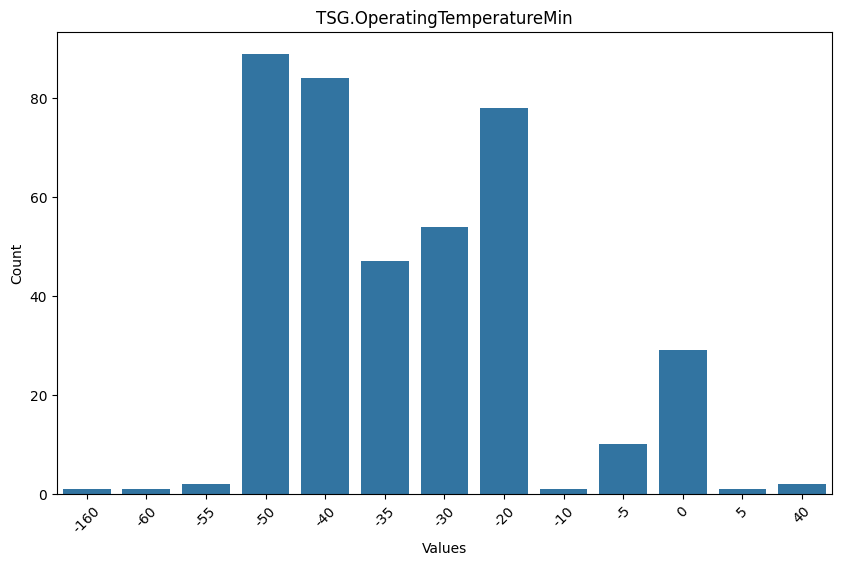

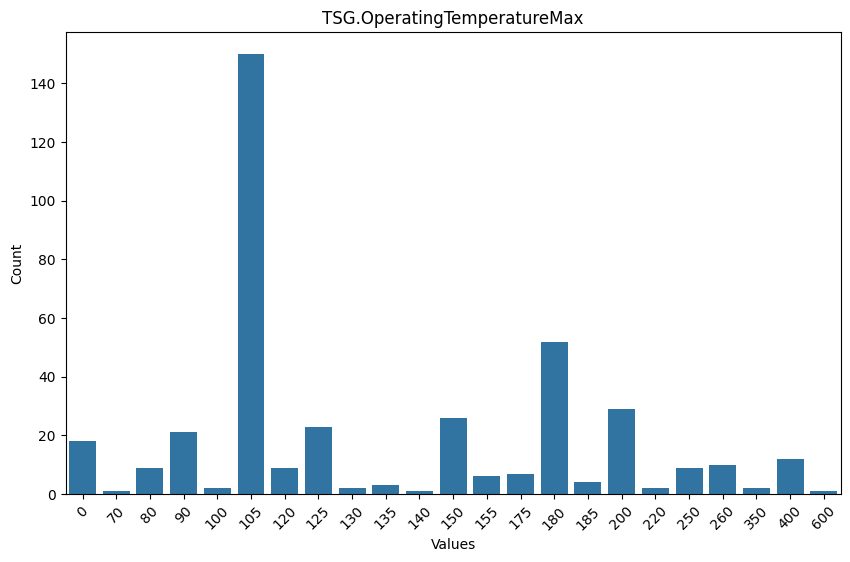

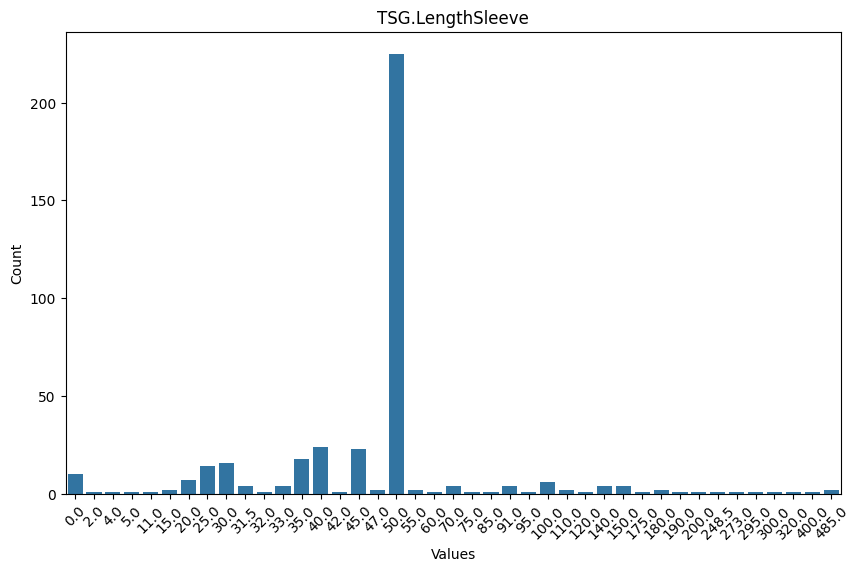

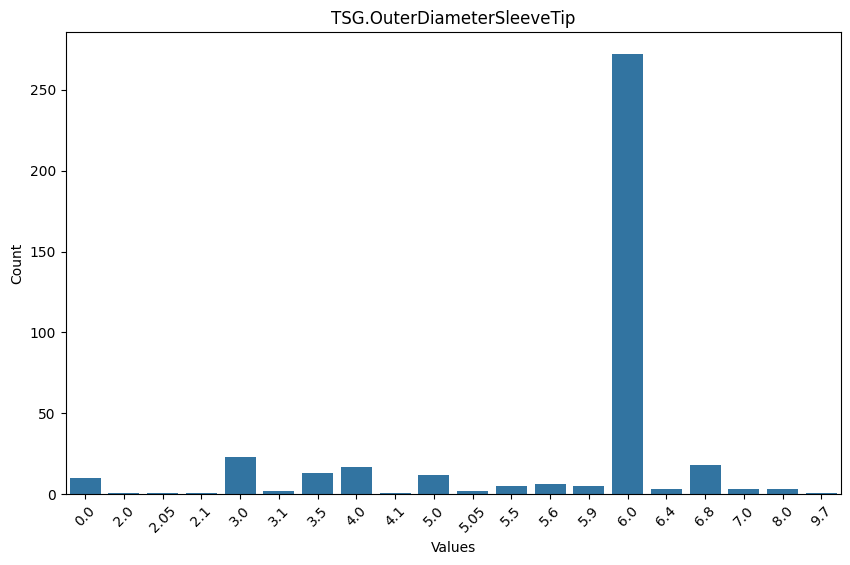

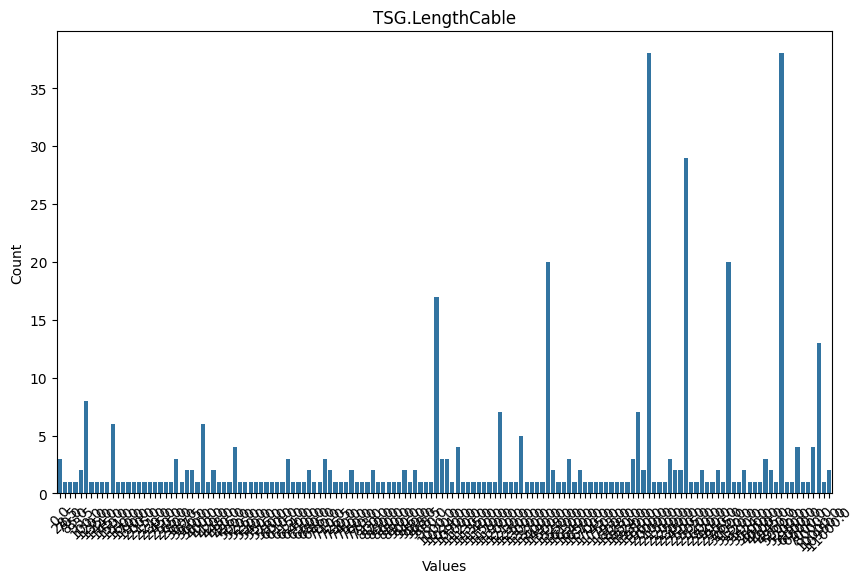

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the data is loaded into a DataFrame named 'probes'
# probes = pd.read_csv('your_data.csv')

columns_core = ["TSG.OperatingTemperatureMin", "TSG.OperatingTemperatureMax", "TSG.WithCable", "TSG.LengthSleeve", "TSG.OuterDiameterSleeveTip",
                "TSG.SensorType", "TSG.LengthCable", "TSG.ConnectorType"]

columns_numeric = ["TSG.OperatingTemperatureMin", "TSG.OperatingTemperatureMax", "TSG.LengthSleeve", "TSG.OuterDiameterSleeveTip", "TSG.LengthCable"]

columns_object = ["TSG.SensorType", "TSG.ConnectorType", "Sensorclass"]

for column in columns_numeric:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=probes, x=column)
    plt.title(column)
    plt.xlabel("Values")
    plt.ylabel("Count")
    plt.xticks(rotation=45)  # Rotate x-axis labels if needed for better readability
    plt.show()

In [12]:
grouped = probes.groupby("TSG.ConnectorType").size()

In [7]:
import pandas as pd
df = pd.read_parquet('../../cache/TSGCableProbes_processed_from_db.parquet')

In [ ]:
import csv
from anytree import Node
from anytree.exporter import DotExporter

nodes = {}
with open('../../res/ClassificationStructure_1700len-kda_20240702_1405MESZ.csv') as f:
    reader = csv.reader(f)
    next(reader)  # skip header
    for i, row in enumerate(reader):
        name = '{}\n{}'.format(row[0], row[1])
        node_id = row[2]
        parent_id = row[3]
        if i == 0:
            node = Node(name)  # root node
        else:
            node = Node(name, nodes[parent_id])
        nodes[node_id] = node

DotExporter(nodes[next(iter(nodes))]).to_picture('tree.png')  # graphviz required
